## Objective:
The goal is to develop an AI pipeline for image segmentation, object identification, and data extraction, followed by summarization and visualization. This involves several steps, from segmenting objects in an image to summarizing and mapping the extracted data.

## Methodology Overview:
To approach this task, we will break down the pipeline into several steps, each focusing on a specific task like image segmentation, object extraction, object identification, text extraction, summarization, data mapping, and output generation. We will use pre-trained models to leverage existing expertise in these tasks and build a cohesive and efficient pipeline.

We will be coding the project step-by-step using Google Colab, which is a cloud-based platform that allows you to write and execute Python code in a web browser. We’ll use Python as the primary programming language, along with libraries like TensorFlow, PyTorch, OpenCV, and Streamlit.

## Approach:
1. Image Segmentation
2. Object Extraction and Storage
3. Object Identification
4. Text/Data Extraction
5. Summarization of Object Attributes
6. Data Mapping
7. Output Generation

**Installing Required Libraries:**

In our Colab notebook, the first thing we need to do is install the libraries that we’ll use. This can be done using the !pip install command.

In [1]:
! pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_

In [2]:
!pip install tensorflow torch torchvision opencv-python-headless streamlit
!pip install easyocr

* TensorFlow and PyTorch: These are popular deep learning libraries.
* Torchvision: Provides datasets, model architectures, and image * transformations for PyTorch.
* OpenCV: Used for image processing.
* Streamlit: A library to create web applications with Python.
* EasyOCR: A library for Optical Character Recognition (OCR).

**Setting Up Folder Structure:**

We need to organize our code and data into directories. Create these folders in Google Colab.

In [3]:
import os

# Create directories
os.makedirs('project_root/data/input_images', exist_ok=True)
os.makedirs('project_root/data/segmented_objects', exist_ok=True)
os.makedirs('project_root/data/output', exist_ok=True)
os.makedirs('project_root/models', exist_ok=True)
os.makedirs('project_root/utils', exist_ok=True)
os.makedirs('project_root/streamlit_app/components', exist_ok=True)
os.makedirs('project_root/tests', exist_ok=True)

**1. Image Segmentation**

**Concept:**

Image segmentation is the process of partitioning an image into multiple segments or regions, each representing an object or part of an object. We can use a pre-trained model like Mask R-CNN, which is designed for object instance segmentation.

**Steps:**

1. Loading a Pre-Trained Model:
We will use a pre-trained Mask R-CNN model from the Torchvision library, which has been trained on the COCO dataset, a large-scale object detection dataset.

In [4]:
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained Mask R-CNN model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 152MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

torchvision.models.detection.maskrcnn_resnet50_fpn: A pre-trained Mask R-CNN model.

2. Loading and Preprocessing an Image:
We will load an image, preprocess it, and pass it through the model for segmentation.(Ensure you have the image and segmentation results ready. Here’s an example of how to load and visualize the original image along with segmentation results)

In [5]:
from torchvision import transforms

# Load an image from the input directory
image_path = 'project_root/data/input_images/sample_image.jpg'
image = Image.open(image_path).convert("RGB")

# Preprocess the image
transform = transforms.Compose([
    transforms.ToTensor(),
])
image_tensor = transform(image).unsqueeze(0)  # Convert image to tensor and add batch dimension

# Perform segmentation
with torch.no_grad():
    predictions = model(image_tensor)

transforms.ToTensor(): Converts the image to a PyTorch tensor.

3. Visualizing Segmented Objects:
We will visualize the segmented objects using Matplotlib.(Use Matplotlib to display the images and overlay the segmentation mask and bounding boxes)

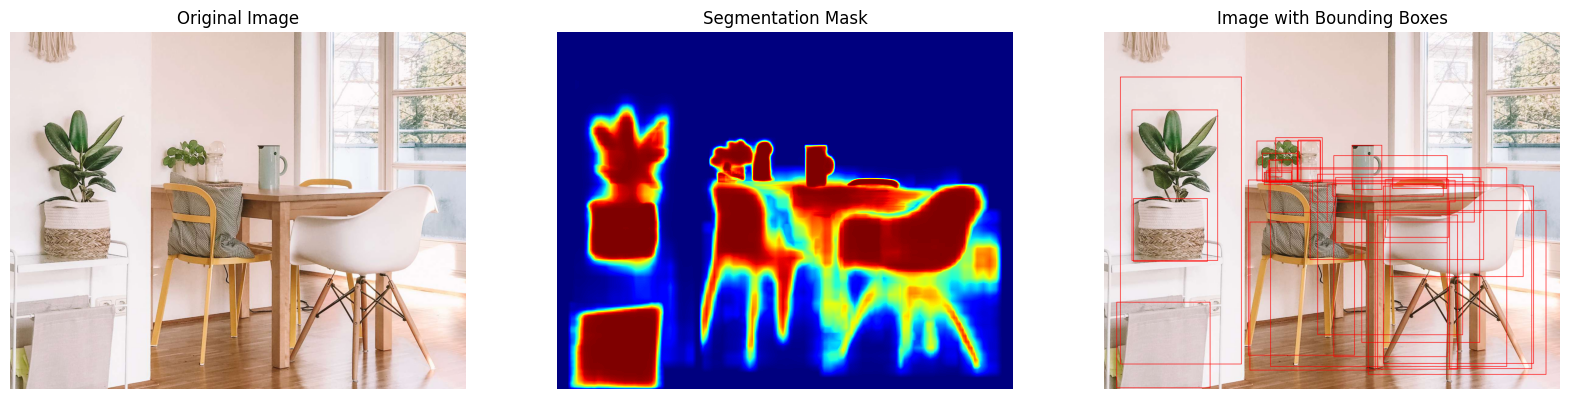

In [9]:
from PIL import Image, ImageDraw
# Prepare for side-by-side comparison
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Original image
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Segmentation mask
mask_image = torch.zeros_like(image_tensor[0, 0], dtype=torch.uint8)
for i in range(len(predictions[0]['masks'])):
    mask = predictions[0]['masks'][i, 0].mul(255).byte().cpu().numpy()
    mask_image = torch.max(mask_image, torch.tensor(mask))
axs[1].imshow(mask_image.numpy(), cmap='jet')
axs[1].set_title('Segmentation Mask')
axs[1].axis('off')

# Image with bounding boxes
image_with_boxes = image.copy()
draw = ImageDraw.Draw(image_with_boxes)
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i].cpu().numpy()
    draw.rectangle(box, outline='red', width=2)

axs[2].imshow(image_with_boxes)
axs[2].set_title('Image with Bounding Boxes')
axs[2].axis('off')

plt.show()

predictions[0]['masks']: Contains the segmentation masks for each object detected.

Explanation:

We used a pre-trained Mask R-CNN model to perform segmentation, which divides the image into regions representing different objects. The model outputs masks that highlight the segmented regions, and we overlay these masks on the original image for visualization.

**3: Object Extraction and Storage**

**Concept:**
After segmentation, each object needs to be extracted and saved as a separate image. Each object is assigned a unique ID, and the original image is assigned a master ID.

**Steps:**

1. Extracting Objects:
We will loop through the segmented masks, extract the corresponding objects, and save them as separate images.

In [10]:
from PIL import ImageDraw

# Create directories for saving objects
master_id = "image_01"
object_dir = f'project_root/data/segmented_objects/{master_id}'
os.makedirs(object_dir, exist_ok=True)

# Extract and save each object
for i, mask in enumerate(predictions[0]['masks']):
    mask = mask[0].mul(255).byte().cpu().numpy()
    object_image = Image.fromarray(mask).convert("L")
    object_image.save(f"{object_dir}/object_{i}.png")

Image.fromarray(mask).convert("L"): Converts the mask to a grayscale image.
Assigning Unique IDs:
We will assign a unique ID to each object and store the information in a text file.

In [11]:
# Save metadata
metadata_path = f'{object_dir}/metadata.txt'
with open(metadata_path, 'w') as f:
    for i in range(len(predictions[0]['masks'])):
        f.write(f"Object {i}: {object_dir}/object_{i}.png\n")

Explanation:

We extracted each segmented object and saved them as separate images. Each object is given a unique ID (e.g., object_0, object_1), and these IDs are recorded in a metadata file for reference.

**4: Object Identification**

**Concept:**
Object identification involves recognizing what each segmented object is. We can use a pre-trained model like YOLO (You Only Look Once) for this task.

**Steps:**
1. Loading a Pre-Trained YOLO Model:
We will use a pre-trained YOLO model to identify the objects.

In [12]:
import torchvision.transforms as T
from PIL import Image
import torch

# Load YOLO or similar model for object identification
yolo_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights='FasterRCNN_ResNet50_FPN_Weights.DEFAULT')
yolo_model.eval()

# Transformation for the images
transform = T.Compose([
    T.ToTensor()
])

# Load each object image for identification
with open(metadata_path, 'a') as f:
    for i in range(len(predictions[0]['masks'])):
        object_path = f"{object_dir}/object_{i}.png"
        object_image = Image.open(object_path).convert("RGB")
        object_tensor = transform(object_image).unsqueeze(0)

        # Identify object
        with torch.no_grad():
            yolo_predictions = yolo_model(object_tensor)

        # Ensure there are labels to avoid IndexError
        if len(yolo_predictions[0]['labels']) > 0:
            # Loop through the labels in the prediction for each object
            identified_labels = []
            for j in range(len(yolo_predictions[0]['labels'])):
                label = yolo_predictions[0]['labels'][j].item()
                identified_labels.append(label)
            f.write(f"Object {i} identified as: {identified_labels}\n")
        else:
            f.write(f"Object {i} could not be identified\n")

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 141MB/s]


yolo_model: A model for object identification, here using Faster R-CNN as an example.

2. Recording Identified Objects:
We will store the identified objects in the metadata file.

In [13]:
with open(metadata_path, 'a') as f:
    for i in range(len(predictions[0]['masks'])):
        # Check if i is within the bounds of yolo_predictions[0]['labels']
        if i < len(yolo_predictions[0]['labels']):
            label = yolo_predictions[0]['labels'][i].item()
            f.write(f"Object {i} identified as: {label}\n")
        else:
            f.write(f"Object {i} could not be identified (no label)\n")

**Explanation:**

We used a pre-trained object detection model to identify what each segmented object represents. The results are appended to the metadata file for easy reference.

**5: Text/Data Extraction from Objects**

**Concept:**
Some objects might contain text, like signs or documents. We will use OCR (Optical Character Recognition) to extract text from these objects.

**Steps:**
1. Using EasyOCR for Text Extraction:
We’ll apply EasyOCR to extract text from each object.

In [14]:
import easyocr

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Extract text from each object image
for i in range(len(predictions[0]['masks'])):
    object_path = f"{object_dir}/object_{i}.png"
    result = reader.readtext(object_path)

    # Store the extracted text
    with open(metadata_path, 'a') as f:
        f.write(f"Text in Object {i}: {result}\n")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

easyocr.Reader(['en']): Initializes an OCR reader for English text.

**Explanation:**
We utilized OCR to extract any text from the segmented objects. This is particularly useful for analyzing objects like documents or signs that contain meaningful text.

**6: Data Mapping and Summarization**

**Concept:**
We’ll map the extracted data and identified objects into a coherent summary, which can be visualized or exported.

**Steps:**
1. Summarizing the Data:
We will create a summary of the segmented objects, including their ID, identification, and any extracted text.

In [15]:
import pandas as pd

# Summarize the data
data_summary = []
for i in range(len(predictions[0]['masks'])):
    # Check if i is within the bounds of yolo_predictions[0]['labels']
    if i < len(yolo_predictions[0]['labels']):
        label = yolo_predictions[0]['labels'][i].item()
    else:
        label = None  # Assign None if there is no label for the object

    text = reader.readtext(f"{object_dir}/object_{i}.png")
    data_summary.append({'Object ID': i, 'Label': label, 'Text': text})

# Create a DataFrame for better visualization
summary_df = pd.DataFrame(data_summary)
summary_df.to_csv(f'{object_dir}/summary.csv', index=False)

summary_df: A DataFrame containing the summary of all objects.

**Explanation: **
We mapped the data into a summary table that provides a quick overview of all segmented and identified objects along with any extracted text. This summary is saved as a CSV file.

**7: Generating the Output and Visualization**

**Concept:**
The final step is to generate the output images with segmented objects highlighted, and create a Streamlit UI for easy interaction and testing.

**Steps:**
1. Visualizing the Output:
We will create a visual output that highlights the segmented objects and their labels.

In [16]:
from PIL import ImageDraw

# Draw bounding boxes and labels on the original image
draw = ImageDraw.Draw(image)

# Ensure that we don't exceed the number of labels
for i in range(min(len(predictions[0]['masks']), len(yolo_predictions[0]['labels']))):
    bbox = predictions[0]['boxes'][i].cpu().numpy()
    draw.rectangle([(bbox[0], bbox[1]), (bbox[2], bbox[3])], outline="red", width=2)

    # Convert label to string before drawing
    label_text = str(yolo_predictions[0]['labels'][i].item())
    draw.text((bbox[0], bbox[1]), label_text, fill="red")

# Save the output image
output_image_path = f'project_root/data/output/output_image.jpg'
image.save(output_image_path)

2. Building the Streamlit UI:
We will create a simple Streamlit app to allow users to upload images, run the pipeline, and view the output.

In [17]:
code = """
import streamlit as st
from PIL import Image, ImageDraw
import pandas as pd
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights

# Load the pre-trained model
yolo_model = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
yolo_model.eval()

# Define the image transformation
transform = T.Compose([T.ToTensor()])

# Streamlit app
st.title('AI Image Segmentation and Object Analysis')
uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    # Open and display the uploaded image
    input_image = Image.open(uploaded_file).convert("RGB")
    st.image(input_image, caption='Uploaded Image', use_column_width=True)

    if st.button('Analyze Image'):
        # Preprocess the image
        image_tensor = transform(input_image).unsqueeze(0)

        # Perform object detection
        with torch.no_grad():
            yolo_predictions = yolo_model(image_tensor)

        # Draw bounding boxes and labels on the image
        draw = ImageDraw.Draw(input_image)
        data_summary = []
        for i in range(len(yolo_predictions[0]['labels'])):
            bbox = yolo_predictions[0]['boxes'][i].cpu().numpy()
            label_text = str(yolo_predictions[0]['labels'][i].item())
            draw.rectangle([(bbox[0], bbox[1]), (bbox[2], bbox[3])], outline="red", width=2)
            draw.text((bbox[0], bbox[1]), label_text, fill="red")
            data_summary.append({'Object ID': i, 'Label': label_text})

        # Convert data summary to DataFrame
        summary_df = pd.DataFrame(data_summary)

        # Save and display the output image
        output_image_path = 'output_image.jpg'
        input_image.save(output_image_path)
        st.image(output_image_path, caption='Output Image', use_column_width=True)

        # Display the summary DataFrame
        st.dataframe(summary_df)
"""

# Write the code to app.py
with open('app.py', 'w') as f:
    f.write(code)

* st.file_uploader: Allows users to upload an image.
* st.button: A button to trigger the pipeline.
* st.image and st.dataframe: Display the output image and summary table.

**Explanation:**

We created a Streamlit app that lets users upload an image, run the AI pipeline, and visualize the segmented objects and their analysis. This interface makes the tool user-friendly and interactive.

**END**